In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Admission_predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
dataset.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [4]:
dataset.drop('Serial No.', axis=1, inplace=True)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
x=dataset.iloc[:,1:8].values   
x

array([[118.  ,   4.  ,   4.5 , ...,   9.65,   1.  ,   0.92],
       [107.  ,   4.  ,   4.  , ...,   8.87,   1.  ,   0.76],
       [104.  ,   3.  ,   3.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [116.  ,   4.  ,   5.  , ...,   9.45,   1.  ,   0.91],
       [103.  ,   3.  ,   3.5 , ...,   8.78,   0.  ,   0.67],
       [117.  ,   4.  ,   5.  , ...,   9.66,   1.  ,   0.95]])

In [6]:
y=dataset.iloc[:,-1].values   
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [7]:
x.shape

(400, 7)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()    
y=lb.fit_transform(y)
y 

array([54, 38, 34, 42, 27, 52, 37, 30, 12,  7, 14, 46, 40, 24, 23, 16, 28,
       27, 25, 24, 26, 32, 56, 57, 59, 56, 38,  6,  8, 16, 27, 36, 53, 52,
       56, 50, 26, 20, 14, 10,  8, 11, 15, 49, 53, 50, 48, 51, 44, 40, 38,
       18, 40, 34, 32, 26, 26,  8,  1,  4, 10,  9, 16, 18, 14, 17, 23, 19,
       30, 40, 56, 58, 55, 46, 36, 34, 36, 26,  6,  8, 12, 58, 54, 54, 56,
       38, 34, 28, 26, 36, 26,  2,  0,  6,  1,  4, 10, 48, 52, 41, 33, 26,
       24, 19, 36, 31, 49, 53, 55, 30, 23, 31, 24, 34, 21, 28, 18,  7,  9,
       33, 56, 56, 19, 23, 19, 26, 47, 40, 46, 54, 58, 39, 33, 41, 51, 44,
       38, 33, 42, 40, 46, 52, 54, 59, 42, 43, 37, 45, 58, 41, 55, 56, 48,
       41, 42, 39, 32, 27, 23, 14, 19, 15, 29, 30, 43, 40, 27, 26, 26, 27,
       30, 51, 48, 51, 49, 47, 52, 44, 34, 35, 33, 33, 30, 37, 34, 51, 46,
       55, 55, 50, 52, 49, 48, 56, 39, 40, 35, 35, 32, 34, 35, 34, 59, 59,
       31, 19, 25, 28, 26, 30, 41, 44, 57, 58, 56, 55, 53, 47, 46, 36, 38,
       37, 38, 33, 29, 23

In [10]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
dataset.corr()#correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


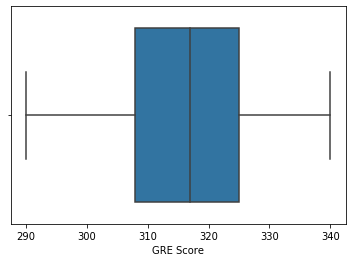

In [12]:
import seaborn as sns
sns.boxplot(dataset['GRE Score'])

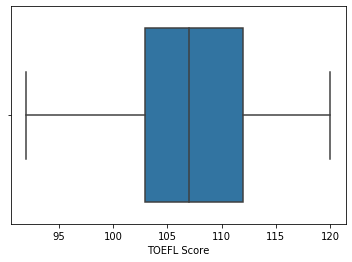

In [13]:
sns.boxplot(dataset['TOEFL Score'])

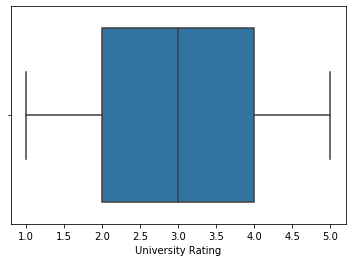

In [14]:
sns.boxplot(dataset['University Rating'])

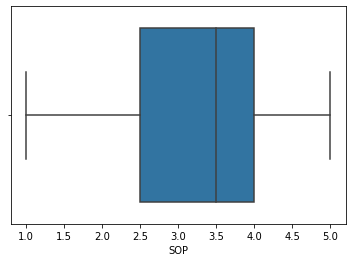

In [15]:
sns.boxplot(dataset['SOP'])

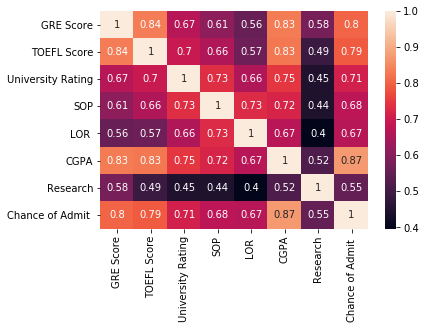

In [16]:
sns.heatmap(dataset.corr(),annot=True)

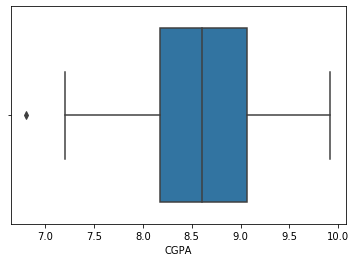

In [17]:
sns.boxplot(dataset['CGPA'])

In [18]:
from scipy import stats #z-score is present in stats
z=np.abs(stats.zscore(dataset))# abs is used to convert negative and positive values into postive
z

array([[1.76210664, 1.74697064, 0.79882862, ..., 1.76481828, 0.90911166,
        1.37364801],
       [0.62765641, 0.06763531, 0.79882862, ..., 0.45515126, 0.90911166,
        0.25029671],
       [0.07046681, 0.56252785, 0.07660001, ..., 1.00563118, 0.90911166,
        0.03054111],
       ...,
       [1.15124883, 1.41704229, 0.79882862, ..., 1.42900622, 0.90911166,
        1.30343855],
       [0.41952842, 0.72749202, 0.07660001, ..., 0.30403584, 1.09997489,
        0.38158839],
       [1.41304503, 1.58200646, 0.79882862, ..., 1.78160888, 0.90911166,
        1.58427637]])

In [19]:
threshold=3
np.where(z>threshold)

(array([58], dtype=int64), array([5], dtype=int64))

In [20]:
dataset=dataset[(z<3).all(axis=1)]
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


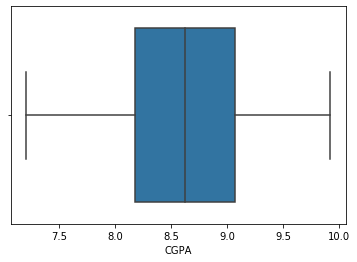

In [21]:
sns.boxplot(dataset['CGPA'])

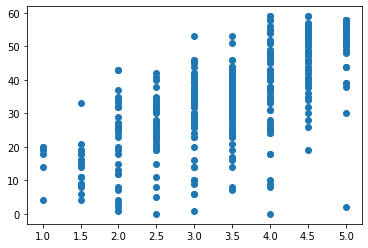

In [24]:
plt.scatter(x[:,2],y)

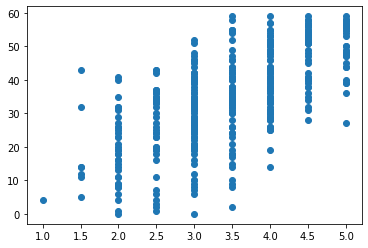

In [25]:
plt.scatter(x[:,3],y)

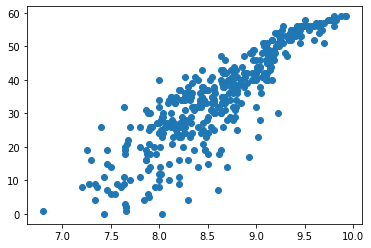

In [26]:
plt.scatter(x[:,4],y)

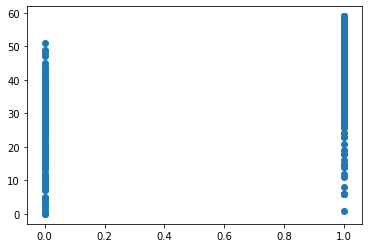

In [27]:
plt.scatter(x[:,5],y)

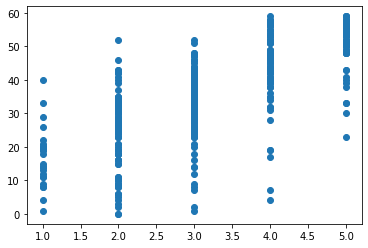

In [28]:
plt.scatter(x[:,1],y)

In [29]:
from sklearn.model_selection import train_test_split          
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#Normialization using standard scalar
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [31]:
x_train

array([[ 0.42056561, -0.09750979, -0.40190441, ...,  0.28993359,
        -1.12672248, -0.04616416],
       [ 0.58488917, -0.09750979, -0.40190441, ...,  0.14151398,
        -1.12672248, -1.43325623],
       [-0.72969931, -0.09750979, -0.40190441, ..., -1.5075928 ,
        -1.12672248, -0.60100099],
       ...,
       [-0.56537575,  0.76924386, -1.36889245, ..., -1.90337843,
        -1.12672248, -1.91873846],
       [ 1.89947766,  1.63599751,  1.04857766, ...,  1.79062075,
        -1.12672248,  1.13286411],
       [ 0.42056561,  0.76924386,  0.56508364, ...,  0.85062989,
         0.88753   ,  0.9248003 ]])

In [32]:
y_train

array([34, 14, 26, 49, 24, 44, 19, 41, 44, 43, 40, 55, 26, 12, 52, 37, 44,
       26, 37, 39, 36, 18, 40, 14, 42, 37, 58, 24, 41, 30, 10, 36, 38, 32,
       48, 53, 52, 40, 32, 21,  0, 33, 53, 31,  9, 54, 56, 33, 36, 26, 55,
       39, 23, 22, 46, 26, 46, 39, 25, 27, 43, 46, 27, 21, 32, 19, 32, 43,
       50, 18, 42, 56, 41, 24, 55, 38, 40, 47, 32, 33, 42, 41, 52, 18, 29,
       56, 36, 48, 38,  9, 26, 43, 35, 33, 35, 51, 55, 48, 37, 46, 29, 46,
       33, 35, 38, 41, 16, 33, 47, 16, 18, 42, 26,  6, 34, 47, 32, 57,  0,
       37, 42, 47, 36, 20, 28, 42, 21, 50, 31, 46, 19, 59, 37, 53, 27, 54,
        6, 31, 27, 38, 24, 20,  8, 25, 56,  8, 39, 51, 58, 24, 19, 58, 58,
       11, 33, 19, 36, 15, 54, 50, 53,  9, 47, 55, 26,  2, 23, 41, 27, 48,
       28, 39, 34, 30, 31, 19, 27, 40, 48, 42, 42, 31, 24, 25, 41, 42, 51,
       26, 26, 34, 28, 33,  9, 30, 41, 12, 39, 46, 52, 34, 34, 26, 44,  1,
       11, 34, 38, 30, 20, 16, 35, 23, 38, 16, 27, 58, 55, 57, 49, 54, 34,
       43, 52, 15, 34, 38

In [33]:
x_test

array([[-0.40105219,  1.63599751,  0.08158962,  0.02594802, -0.08936097,
        -1.12672248, -0.11551876],
       [ 0.42056561,  0.76924386,  0.08158962, -0.52760981, -0.0233967 ,
        -1.12672248, -0.18487337],
       [ 0.42056561, -0.09750979,  0.08158962,  0.02594802,  0.24046038,
         0.88753   ,  0.43931807],
       [-0.40105219, -0.96426343, -0.40190441, -1.08116764, -0.58409301,
        -1.12672248,  0.02319045],
       [-0.40105219, -0.09750979, -0.40190441,  0.02594802,  0.19098718,
        -1.12672248, -0.04616416],
       [-1.22267   , -0.96426343, -0.40190441, -0.52760981, -0.84795009,
        -1.12672248, -1.71067465],
       [ 0.25624205, -0.09750979, -0.40190441, -0.52760981,  0.12502291,
        -1.12672248,  0.30060886],
       [-0.56537575, -0.09750979,  0.08158962,  0.57950586, -0.86444116,
        -1.12672248, -0.11551876],
       [ 1.7351541 , -0.96426343,  1.04857766,  0.02594802,  1.22992445,
         0.88753   ,  1.20221871],
       [ 1.57083054,  0.7692

In [34]:
y_test

array([33, 32, 41, 35, 34, 10, 39, 33, 52, 56, 20, 51, 34, 19, 40,  4, 26,
       46, 25, 34, 52, 45, 19,  9, 47, 29,  6, 16, 54, 24, 30, 35, 35, 23,
       17, 36, 26, 51, 35, 57, 33, 34, 37, 38, 48, 32,  3, 41, 23, 26, 33,
       42, 23, 51, 30, 41, 40, 14, 38, 50, 36, 11, 27, 21, 49, 51, 43, 52,
       42, 38, 30, 49, 30, 26, 53, 23, 31, 24, 55,  5], dtype=int64)

In [35]:
from sklearn.linear_model import LinearRegression
mr= LinearRegression()

In [36]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
from joblib import dump
dump(mr,'mlr.save')

['mlr.save']

In [37]:
y_pred=mr.predict(x_test)
y_pred

array([33.14252433, 32.12494536, 40.96911963, 34.90173767, 33.98065567,
       10.41701607, 38.87836817, 33.00737364, 51.83497589, 55.81819526,
       19.92402856, 50.92964141, 34.03217232, 19.02903985, 40.09490896,
        4.46028356, 26.1765856 , 45.90908513, 25.14235876, 34.07005615,
       51.89456698, 44.95463633, 19.28181466,  9.24037071, 47.00982413,
       29.11358223,  6.57296307, 16.41304817, 53.91259822, 24.22797731,
       30.00169459, 35.08556533, 35.24374255, 23.08988981, 17.45291923,
       36.02400671, 26.23580706, 50.86867449, 34.94205214, 56.8909367 ,
       33.12213263, 33.83333722, 36.95027396, 38.12680887, 47.78817592,
       31.97019249,  1.46969417, 40.94448499, 23.03339182, 26.00705168,
       32.88167328, 41.85466347, 23.2002688 , 50.90164923, 30.30675378,
       40.88733627, 40.04946478, 14.51275227, 38.16307554, 50.05640902,
       35.91731592, 11.18175976, 26.94534936, 21.09909989, 48.93428878,
       50.79733006, 42.71736918, 51.98860789, 41.81836356, 37.97

In [38]:
y_test

array([33, 32, 41, 35, 34, 10, 39, 33, 52, 56, 20, 51, 34, 19, 40,  4, 26,
       46, 25, 34, 52, 45, 19,  9, 47, 29,  6, 16, 54, 24, 30, 35, 35, 23,
       17, 36, 26, 51, 35, 57, 33, 34, 37, 38, 48, 32,  3, 41, 23, 26, 33,
       42, 23, 51, 30, 41, 40, 14, 38, 50, 36, 11, 27, 21, 49, 51, 43, 52,
       42, 38, 30, 49, 30, 26, 53, 23, 31, 24, 55,  5], dtype=int64)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9996255392731679